In [1]:
import torch
from torchvision.datasets import MNIST

In [2]:
dataset=MNIST(root='data/',download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset=MNIST(root='data/',train=False,download=True)

In [5]:
dataset[7]

(<PIL.Image.Image image mode=L size=28x28 at 0x23D2A3F7130>, 3)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

1


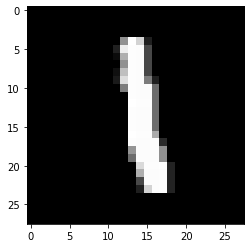

In [7]:
image,label=dataset[6]
plt.imshow(image, cmap='gray')
print(label)

In [8]:
import torchvision.transforms as transforms

In [9]:
dataset=MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [10]:
img_tensor,label=dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [11]:
import numpy as np
n=60000
val_pct=0.1
n_val=val_pct *n
idxs=np.random.permutation(n)
idxs[:5]

array([42363, 21379, 20609, 43274,  4182])

In [13]:
def split_indices(n,val_pct):
    nval=int(n*val_pct)
    idxs=np.random.permutation(n)
    return idxs[nval:],idxs[:nval]

In [14]:
train_indices, val_indices=split_indices(len(dataset),0.2)

In [15]:
print(len(train_indices),len(val_indices))
print("first few validation indices  ",val_indices[0:10])

48000 12000
first few validation indices   [38128 17219 33181 37375 50526 52160 25764 42316 30591 56919]


In [16]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [17]:
batch_size=100

train_sampler=SubsetRandomSampler(train_indices)
train_loader=DataLoader(dataset, batch_size, sampler=train_sampler)

val_sampler=SubsetRandomSampler(val_indices)
val_loader=DataLoader(dataset,batch_size,sampler=val_sampler)


# Save and commit the notebook

In [19]:
import jovian

In [34]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/v-jha85/torch-logistic-regression


'https://jovian.ai/v-jha85/torch-logistic-regression'

In [18]:
import torch.nn as nn
input_size=28*28
num_classes=10


In [19]:
#define model
model=nn.Linear(input_size,num_classes)
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [20]:
model.weight

Parameter containing:
tensor([[ 0.0210,  0.0006,  0.0171,  ...,  0.0346,  0.0198, -0.0022],
        [-0.0147, -0.0103,  0.0036,  ...,  0.0121,  0.0245,  0.0223],
        [ 0.0300, -0.0308,  0.0080,  ...,  0.0222,  0.0334,  0.0128],
        ...,
        [-0.0162, -0.0087, -0.0034,  ...,  0.0098,  0.0009, -0.0087],
        [ 0.0258, -0.0144, -0.0217,  ..., -0.0043,  0.0265, -0.0303],
        [ 0.0078, -0.0016, -0.0237,  ...,  0.0034,  0.0334, -0.0056]],
       requires_grad=True)

In [21]:
for images,labels in train_loader:
    print(labels)
    print(images.shape)
    outputs=model(images.reshape(-1,784))
    break

tensor([1, 3, 4, 1, 7, 8, 2, 8, 4, 0, 1, 2, 6, 5, 3, 2, 6, 5, 6, 3, 1, 7, 8, 7,
        3, 3, 7, 9, 9, 5, 9, 8, 4, 6, 4, 4, 6, 0, 2, 1, 5, 7, 9, 9, 0, 1, 0, 2,
        5, 6, 9, 6, 5, 0, 8, 6, 8, 7, 2, 3, 5, 4, 0, 2, 7, 2, 1, 7, 9, 4, 0, 5,
        9, 4, 3, 9, 6, 2, 1, 3, 7, 7, 8, 0, 4, 6, 1, 6, 2, 9, 5, 6, 1, 2, 5, 4,
        3, 6, 3, 2])
torch.Size([100, 1, 28, 28])


In [22]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [23]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [24]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0054, -0.0186, -0.0351,  ...,  0.0125,  0.0027, -0.0060],
         [-0.0184,  0.0261,  0.0224,  ...,  0.0018, -0.0164, -0.0211],
         [-0.0346,  0.0153, -0.0150,  ...,  0.0310,  0.0315, -0.0009],
         ...,
         [-0.0104, -0.0043, -0.0129,  ...,  0.0178,  0.0047, -0.0015],
         [-0.0109, -0.0041, -0.0148,  ...,  0.0226,  0.0266, -0.0036],
         [ 0.0311, -0.0241,  0.0230,  ..., -0.0269, -0.0040, -0.0198]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0025, -0.0005, -0.0070, -0.0311, -0.0165,  0.0081, -0.0191, -0.0335,
         -0.0300,  0.0052], requires_grad=True)]

In [25]:
for images,labels in train_loader:
    outputs=model(images)
    break
print('outputs.shape:', outputs.shape)
print('sample output: ', outputs[:2].data)

outputs.shape: torch.Size([100, 10])
sample output:  tensor([[-0.1603,  0.2341,  0.3223,  0.1288,  0.2555, -0.1087, -0.0421,  0.0413,
          0.3913, -0.2489],
        [-0.2007,  0.2012, -0.1525,  0.2864,  0.0440,  0.3112, -0.1187, -0.0988,
         -0.0495, -0.1251]])


In [26]:
import torch.nn.functional as F

In [27]:
#apply softmax to each output
probs=F.softmax(outputs,dim=1)
max_probs,preds=torch.max(probs,1)
print(preds)

tensor([8, 5, 6, 6, 8, 8, 1, 7, 6, 1, 6, 7, 1, 8, 1, 8, 8, 8, 8, 1, 2, 3, 8, 8,
        2, 8, 6, 1, 4, 8, 5, 1, 1, 1, 8, 6, 6, 8, 1, 1, 1, 8, 8, 5, 4, 4, 1, 1,
        9, 1, 4, 1, 4, 6, 8, 5, 1, 8, 1, 1, 2, 8, 5, 6, 8, 5, 4, 3, 1, 8, 8, 1,
        1, 4, 8, 8, 8, 6, 8, 8, 8, 8, 8, 1, 1, 1, 1, 9, 1, 3, 7, 8, 6, 8, 8, 8,
        9, 6, 4, 8])


In [28]:
labels

tensor([9, 0, 7, 3, 3, 3, 0, 8, 8, 9, 5, 4, 1, 4, 9, 6, 9, 7, 7, 0, 5, 3, 9, 6,
        1, 0, 3, 1, 5, 4, 0, 2, 4, 4, 3, 2, 5, 2, 3, 9, 0, 5, 7, 1, 7, 4, 5, 3,
        1, 0, 7, 4, 1, 8, 5, 5, 0, 4, 2, 5, 9, 7, 0, 3, 7, 8, 0, 2, 4, 9, 6, 4,
        2, 7, 9, 6, 9, 7, 6, 0, 6, 4, 6, 2, 8, 1, 9, 5, 9, 2, 0, 6, 3, 4, 7, 7,
        5, 1, 1, 5])

In [29]:
##save and commit
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········


[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········


ApiError: The API key provided is invalid or expired.

In [30]:
torch.sum(labels==preds)/len(labels)

tensor(0.0600)

In [31]:
def accuracy(l1,l2):
    acc=torch.sum(l1==l2)/len(l1)
    return acc

In [32]:
accuracy(labels,preds)

tensor(0.0600)

In [33]:
loss_fn=F.cross_entropy

In [34]:
loss=loss_fn(outputs,labels)
print(loss)

tensor(2.3639, grad_fn=<NllLossBackward0>)


In [35]:
learning_rate=1e-3
optimizer=torch.optim.SGD(model.parameters(),learning_rate)

In [36]:
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
    preds=model(xb)
    loss=loss_func(preds,yb)
    if opt is not None:
        loss.backward()#computes gradient
        opt.step()#updates the parameters
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        metric_result=metric(preds,yb)
    
    return loss.item(),len(xb),metric_result

        

In [37]:
def evaluate(model,loss_fn,valid_dl, metric=None):
    with torch.no_grad():
        results=[loss_batch(model,loss_fn,xb,yb,metric=metric) for xb,yb in valid_dl]
        losses,nums,metrics=zip(*results)
        
        total=np.sum(nums)
        avg_loss=np.sum(np.multiply(losses,nums))/total
        avg_metric=None
        if metric is not None:
            #average of metric across batches
            avg_metric=np.sum(np.multiply(metrics,nums))/total
    return avg_loss, total, avg_metric
    

In [38]:
def accuracy(outputs,labels):
    _,preds=torch.max(outputs,dim=1)
    return torch.sum(preds==labels).item()/len(preds)

In [39]:
val_loss, total,val_acc=evaluate(model,loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss,val_acc))

Loss: 2.3261, Accuracy: 0.1330


In [40]:
def fit(epochs,model,loss_fn,opt, train_dl,valid_dl,metric=None):
    for epoch in range(epochs):
        #training
        for xb,yb in train_dl:
            loss,_,_=loss_batch(model,loss_fn,xb,yb,opt)
            
        #Evaluation
        result=evaluate(model,loss_fn,valid_dl,metric)
        val_loss,total,val_metric=result
        
        #print the progress
        if metric is None:
           print('Epoch [{}/{}], loss: {:.4f}'.format(epoch+1,epochs,val_loss)) 
        else:
            print('Epoch [{}/{}],Loss: {:.4f}, {}: {:.4f}'.format(epoch+1,epochs,val_loss,metric.__name__,val_metric))

In [41]:
#redefine model and optimizzer
model=MnistModel()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [42]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5],Loss: 1.8661, accuracy: 0.6720
Epoch [2/5],Loss: 1.5714, accuracy: 0.7557
Epoch [3/5],Loss: 1.3631, accuracy: 0.7842
Epoch [4/5],Loss: 1.2128, accuracy: 0.8006
Epoch [5/5],Loss: 1.1009, accuracy: 0.8148


torch.Size([1, 28, 28])

In [54]:
import jovian

jovian.log_hyperparams({'opt':'SGD','lr':0.001,'batch_size':'100','arch':'logistic-regression'})

[jovian] Hyperparams logged.


In [55]:
jovian.log_metrics({'val_loss':1.1075,'val_acc':0.8073})

[jovian] Metrics logged.


## Testing in test data

In [43]:
#prediction on a run time image
test_dataset=MNIST(root='data/',train=False,transform=transforms.ToTensor(),download=True)


label : 7


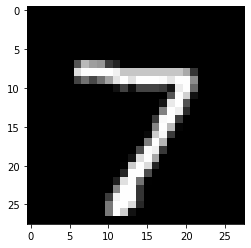

In [44]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('label :',label)

In [45]:
img.unsqueeze(0).shape


torch.Size([1, 1, 28, 28])

In [46]:
def pred_image(img,model):
    xb=img.unsqueeze(0)
    yb=model(xb)
    _,preds=torch.max(yb,dim=1)
    return preds[0].item()

label : 0 , predicted:  0


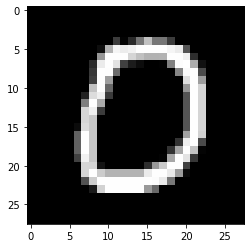

In [47]:
img,label=test_dataset[10]
plt.imshow(img[0],cmap='gray')
print('label :',label, ', predicted: ',pred_image(img,model))


In [68]:
torch.save(model.state_dict(),'mnist-logistic.pth')

In [48]:
#to load the state_dict()
model2=MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0308, -0.0193, -0.0198,  ...,  0.0067,  0.0201,  0.0304],
                      [-0.0038,  0.0350,  0.0017,  ..., -0.0167, -0.0245, -0.0314],
                      [ 0.0122,  0.0154,  0.0027,  ...,  0.0351,  0.0213, -0.0198],
                      ...,
                      [-0.0283,  0.0223, -0.0235,  ...,  0.0070, -0.0195, -0.0002],
                      [-0.0285,  0.0347, -0.0087,  ..., -0.0047, -0.0067, -0.0181],
                      [-0.0355,  0.0122,  0.0129,  ..., -0.0038,  0.0251, -0.0021]])),
             ('linear.bias',
              tensor([-0.0420,  0.0524, -0.0225, -0.0026,  0.0197,  0.0268, -0.0364,  0.0211,
                      -0.0616, -0.0154]))])

In [70]:
jovian.commit(atrifacts=['mnist-logistic.pth'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "v-jha85/torch-logistic-regression" on https://jovian.ai/
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/v-jha85/torch-logistic-regression


'https://jovian.ai/v-jha85/torch-logistic-regression'